# 07. Results from the different machine learning models
__Capstone project: Duration of the insertion of real estate advertisements for rental apartments in Switzerland__

In [1]:
# import commands
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import df, model evaluations and predictions

In [2]:
# import original dataframe
df = pd.read_csv("Data/df_after_eda.csv", delimiter=",")
df.shape

(921886, 142)

In [3]:
# import model evaulations
evalu = pd.read_csv("ML_evaluations.csv", delimiter=",")
evalu

,Model,MAE,MSE,RMSE,R2
0,Lasso,0.854559,1.098835,1.048254,0.109544
1,Random Forest,0.851865,1.093072,1.045501,0.114214
2,K-nn,0.852159,1.095476,1.046650,0.111392


In [4]:
# display of normal values instead of log values
evalu["MAE_normal"]=np.exp(evalu["MAE"])
evalu

,Model,MAE,MSE,RMSE,R2,MAE_normal
0,Lasso,0.854559,1.098835,1.048254,0.109544,2.350337
1,Random Forest,0.851865,1.093072,1.045501,0.114214,2.344014
2,K-nn,0.852159,1.095476,1.046650,0.111392,2.344703


In [5]:
# import lasso predictions on test data
lasso = pd.read_csv("ML_predictions_lasso.csv", delimiter=",")
# import lasso predictions on train data
lasso_tr = pd.read_csv("ML_predictions_lasso_train.csv", delimiter=",")

# print some rows
lasso.head()

,Model,True Value,Prediction,Error
0,lasso,89.0,41.105807,47.894193
1,lasso,14.0,28.328459,-14.328459
2,lasso,13.0,32.145318,-19.145318
3,lasso,94.0,22.953456,71.046544
4,lasso,4.0,23.228441,-19.228441


In [6]:
# import knn predictions on test data
knn = pd.read_csv("ML_predictions_knn.csv", delimiter=",")
# import knn predictions on train data
knn_tr = pd.read_csv("ML_predictions_knn_train.csv", delimiter=",")

# print some rows
knn.head()

,Model,True Value,Prediction,Error
0,knn,15.0,20.243902,-5.243902
1,knn,84.0,29.101549,54.898451
2,knn,72.0,46.002044,25.997956
3,knn,24.0,24.608539,-0.608539
4,knn,90.0,76.383069,13.616931


In [23]:
# import rf predictions on test data
rf = pd.read_csv("ML_predictions_rf.csv", delimiter=",")
# import rf predictions on train data
rf_tr = pd.read_csv("ML_predictions_rf_train.csv", delimiter=",")

# print some rows
rf.head()

,Model,True Value,Prediction,Error
0,random forest,89.000,37.472,51.528
1,random forest,14.000,28.458,-14.458
2,random forest,13.000,25.397,-12.397
3,random forest,94.000,19.782,74.218
4,random forest,4.000,24.460,-20.460


## Statistics

In [8]:
# set display options
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# statistics on lasso test predictions
lasso.describe()

,True Value,Prediction,Error
count,184378.0,184378.0,184378.0
mean,56.4,33.4,23.0
std,66.5,12.3,64.3
min,3.0,5.8,-122.4
25%,14.0,24.8,-15.1
50%,29.0,31.6,-0.9
75%,71.0,39.8,35.9
max,364.0,162.0,348.6


In [9]:
# statistics on knn test predictions
knn.describe()

,True Value,Prediction,Error
count,20000.0,20000.0,20000.0
mean,56.2,33.7,22.5
std,66.6,13.3,64.0
min,3.0,8.6,-95.5
25%,14.0,24.3,-15.1
50%,29.0,31.5,-0.6
75%,70.0,40.6,35.0
max,364.0,187.6,346.1


In [10]:
# statistics on random forest test predictions
rf.describe()

,True Value,Prediction,Error
count,184378.0,184378.0,184378.0
mean,56.4,33.2,23.3
std,66.5,10.9,64.2
min,3.0,9.8,-62.0
25%,14.0,26.2,-15.1
50%,29.0,31.9,-1.0
75%,71.0,37.5,36.0
max,364.0,72.7,353.0


For all my models the predicted median is very close to the true median. However the predicted mean is much lower than the true mean. All my models have a big discrepancy to the true max value (knn comes closest) and the std is to low. In general the predicted values for 25%, 50% and 75% percentile are very similar between my models.

## Baseline model

The Dummy Regressor is used to set up a baseline for comparing other existing Regressor. As a strategy I will use the median of the training target values.

In [11]:
from sklearn.model_selection import train_test_split

# Split into train / validation set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=8)

In [12]:
# Create X/y variables
X_tr = train_df.drop("Insertionsdauer", axis=1).values
y_tr = train_df["Insertionsdauer"].values

X_te = test_df.drop("Insertionsdauer", axis=1).values
y_te = test_df["Insertionsdauer"].values

In [13]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy="median")

# Fit the estimator
dummy.fit(None, y_tr)

DummyRegressor(strategy='median')

In [14]:
# compute prediction
dummy_te_pred = dummy.predict(X_te)

from sklearn.metrics import mean_absolute_error as MAE

# MAE: Average errors test set 
print("The predictions from the baseline is wrong by in average {:.2f} days.".format(np.exp(MAE(y_te, dummy_te_pred))))

The predictions from the baseline is wrong by in average 2.48 days.


In [15]:
# Compute test accuracy
r2_dummy = dummy.score(None, y_te)

# R2: Accuracy test set 
print("Test accuracy: {:.4f}".format(r2_dummy))

Test accuracy: -0.0048


Since 𝑅2 compares the fit of my baseline model with that of a horizontal straight line (= the null hypothesis), a negative 𝑅2 score means that my baseline model fits worse than a horizontal line, thus worse than the mean. 

## Comparing MAE to baseline

MAE median baseline: 2.481 days
MAE lasso regression: 2.350 days
MAE knn regression: 2.344 days
MAE random forest regression: 2.344 days


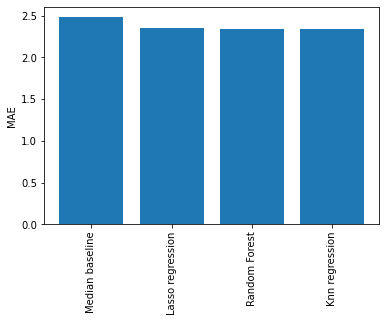

In [22]:
# Compare models using a bar chart

# Final comparison
mae_values = [np.exp(MAE(y_te, dummy_te_pred)), evalu.iloc[0]['MAE_normal'], evalu.iloc[1]['MAE_normal'], evalu.iloc[2]['MAE_normal']]
titles = ["Median baseline",  "Lasso regression", "Random Forest", "Knn regression"]

# Print MAE
print("MAE median baseline: {:.3f} days".format(np.exp(MAE(y_te, dummy_te_pred))))
print("MAE lasso regression: {:.3f} days".format(evalu.iloc[0]['MAE_normal']))
print("MAE knn regression: {:.3f} days".format(evalu.iloc[1]['MAE_normal']))
print("MAE random forest regression: {:.3f} days".format(evalu.iloc[1]['MAE_normal']))

# Plot barcharts
xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles, rotation=90)
plt.ylabel("MAE")
plt.show()

The Mean Absolute Error (MAE) measures the absolute values of the residuals. The the smaller the MAE the better. The knn and random forest model have the best MAE value. However all the scores are just slithly lower than the baseline, meaning there is not much improvement

## MSE, RMSE, R2

In [17]:
pd.set_option('float_format', '{:.3f}'.format)

evalu[['Model','MSE','RMSE','R2']]

,Model,MSE,RMSE,R2
0,Lasso,1.099,1.048,0.110
1,Random Forest,1.093,1.046,0.114
2,K-nn,1.095,1.047,0.111


The Mean Squared Error (MSE) is similar to MAE, but it squares the absolute values of the errors. Therefore large errors are even larger - they get overweight. The best MSE score is obtained with the Random Forest Model. 

The Root Mean Squared Error (RMSE) is the square root of the MSE cost function. By scaling the values back to the same units, this metrics tries to solve the interpretation problem raised with the MSE. It shows how much the data may vary. Again, the smallest RMSE value is obtained by the Random Forest Model. 

R2, the coefficient of determination, doesn’t directly express the error made by our model. This score measures how my models can explain how the target variable varies using the input variable. My R2 coefficients are around 10-14%, which indicates bad performance.

## Comparing histograms & KDE

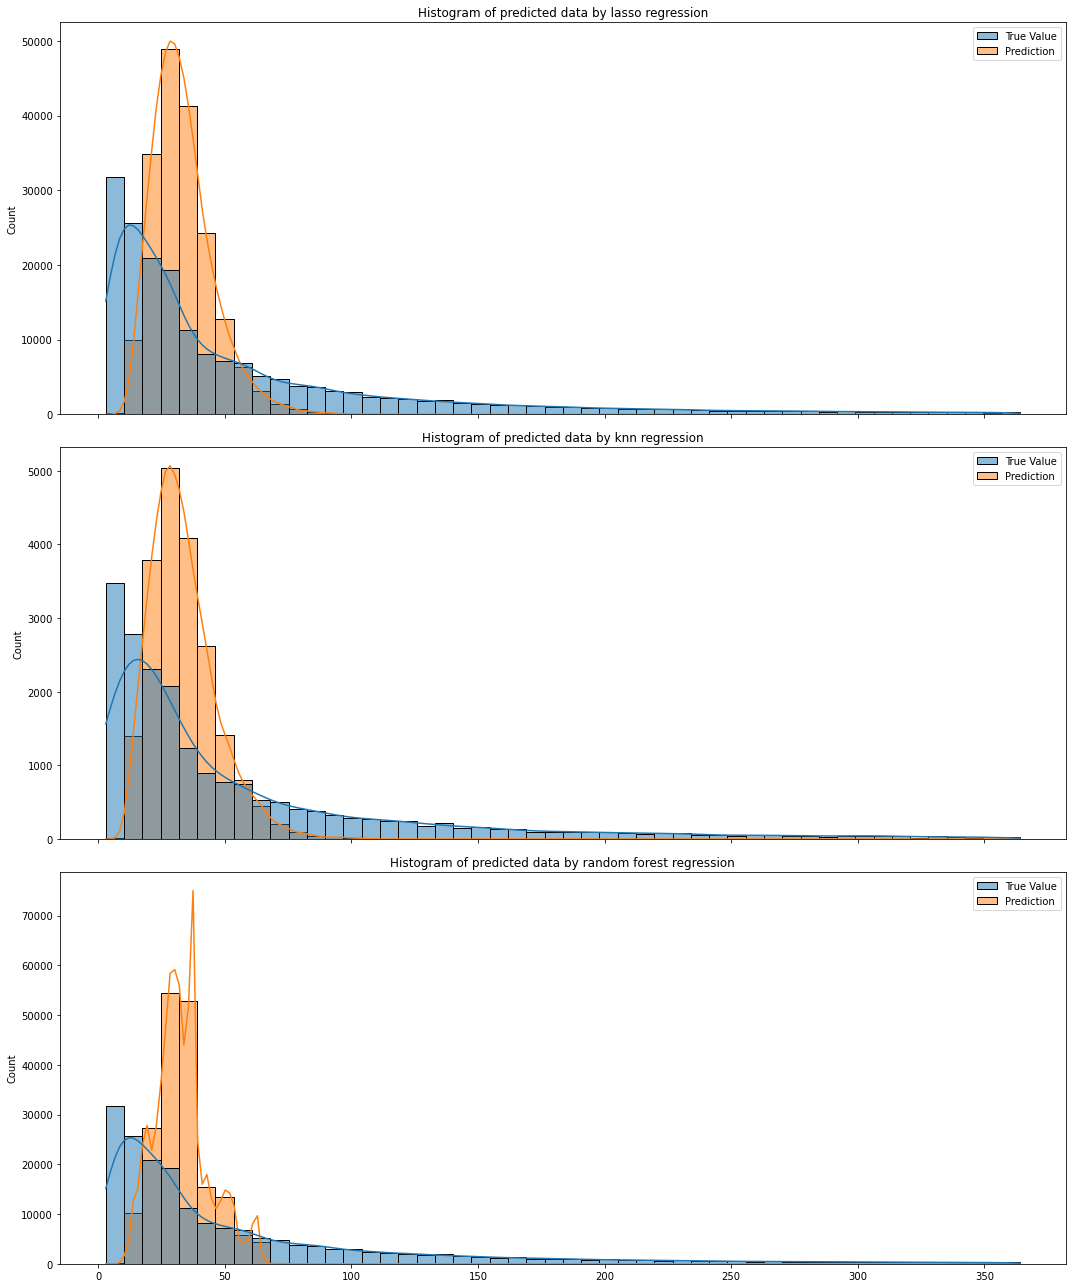

In [18]:
# create histograms for target variable
fig, ax = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

sns.histplot(data=lasso[["True Value", "Prediction"]], bins=50, kde=True,
             ax=ax[0]).set_title("Histogram of predicted data by lasso regression")
sns.histplot(data=knn[["True Value", "Prediction"]], bins=50, kde=True,
             ax=ax[1]).set_title("Histogram of predicted data by knn regression")
sns.histplot(data=rf[["True Value", "Prediction"]], bins=50, kde=True,
             ax=ax[2]).set_title("Histogram of predicted data by random forest regression")

plt.tight_layout()
plt.show()


These plots show, that my models perform a regression to the mean. Data points with rather extreme values of y are shrinked towards the mean of y. All my models have bad performance when it comes to predicting very short and very long durations.

Next I will compare the KDE for all my models with the true values. This time I'll have a look at both the train and test predictions of my models. If both the train and test predictions are similarly off from the true values, the models are not capable of making good predictions. However, if only my test predictions are off, then there might be a difference in the data sets.

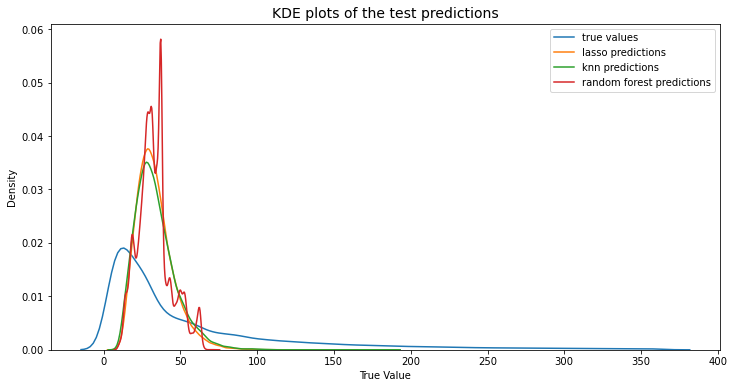

In [59]:
# Plot KDE of the test predictions
plt.figure(figsize=(12, 6))

sns.kdeplot(lasso['True Value'], label="true values")
sns.kdeplot(lasso['Prediction'], label="lasso predictions")
sns.kdeplot(knn['Prediction'], label="knn predictions")
sns.kdeplot(rf['Prediction'], label="random forest predictions")

plt.title("KDE plots of the test predictions", fontsize=14)
plt.legend()
plt.show()

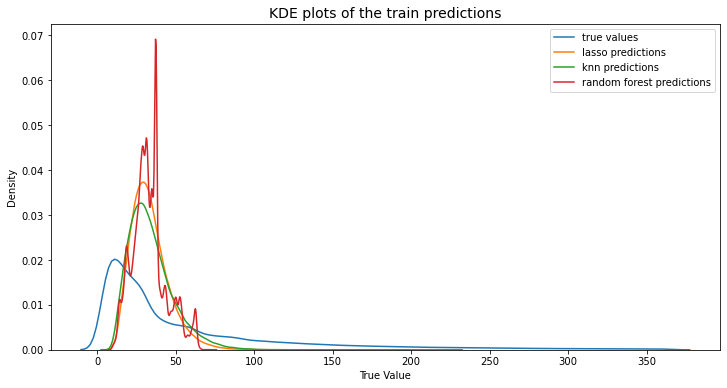

In [69]:
# Plot KDE of the train predictions
plt.figure(figsize=(12, 6))

sns.kdeplot(lasso_tr['True Value'], label="true values")
sns.kdeplot(lasso_tr['Prediction'], label="lasso predictions")
sns.kdeplot(knn_tr['Prediction'], label="knn predictions")
sns.kdeplot(rf_tr['Prediction'], label="random forest predictions")

plt.title("KDE plots of the train predictions", fontsize=14)
plt.legend()
plt.show()

The KDE plot of the test and the train predictions are similar. 

_Note: The plot of the true values shows negative 𝑥-values with some positive density from a kernel density estimate because of the way KDEs work. (see [Link](https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables))_

## Destribution of errors

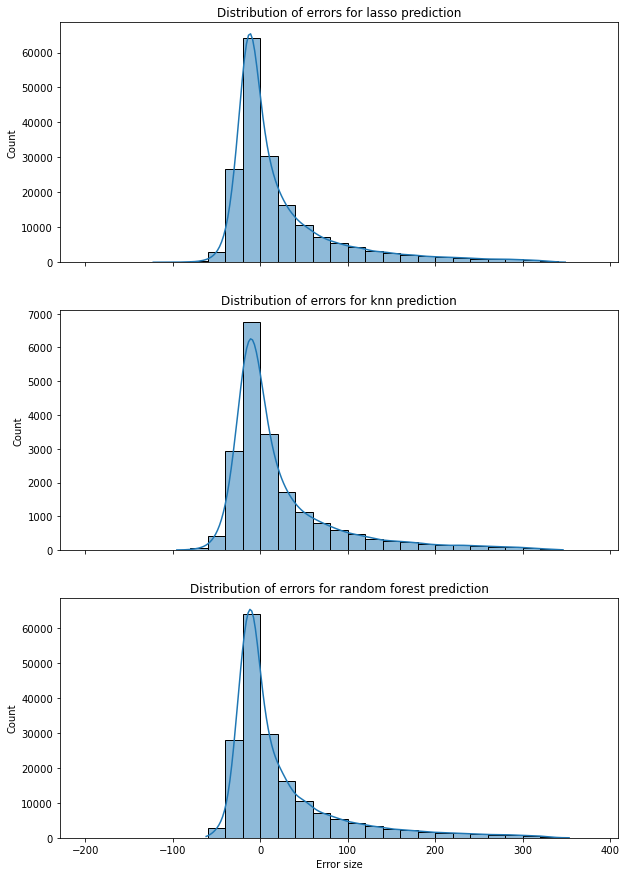

In [48]:
# create histograms for target variable
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharey=False, sharex=True)

# Plot histogram with bins
sns.histplot(x=lasso['Error'], bins=np.arange(-200, 400, 20), kde=True, ax=ax[0]).set_title("Distribution of errors for lasso prediction")
sns.histplot(x=knn['Error'], bins=np.arange(-200, 400, 20), kde=True, ax=ax[1]).set_title("Distribution of errors for knn prediction")
sns.histplot(x=rf['Error'], bins=np.arange(-200, 400, 20), kde=True, ax=ax[2]).set_title("Distribution of errors for random forest prediction")

plt.xlabel("Error size")
plt.show()



There is a high peak around zero and a skewness towards the right. This indicats underestimating the duration of insertion.

## Geographical comparison

In [26]:
# import original df before one-hot encoding
df_2 = pd.read_csv(
    "Data/ads&stats_after_eda.csv",
    delimiter=",",
    dtype={"Minergie": "str", "Rollstuhlgängig": "str"},
)  # specify the column types to avoid DtypeWarning
df_2.shape

(921886, 31)

In [27]:
# split to compare test set
train_df2, test_df2 = train_test_split(df_2, test_size=0.2, random_state=8)

In [28]:
# add predictions from lasso and random forest
test_df2["lasso_pred"] = lasso["Prediction"].values
test_df2["lasso_error"] = lasso["Error"].values

test_df2["rf_pred"] = rf["Prediction"].values
test_df2["rf_error"] = rf["Error"].values

test_df2["Insertionsdauer_normal"] = np.exp(test_df2["Insertionsdauer"]).values

In [29]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184378 entries, 751043 to 598851
Data columns (total 36 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Gemeinde                                      184378 non-null  object 
 1   Anzahl Zimmer                                 184378 non-null  float64
 2   Breitengrad                                   184378 non-null  float64
 3   Insertionsdauer                               184378 non-null  float64
 4   Längengrad                                    184378 non-null  float64
 5   Nettomiete pro m2 und Jahr                    184378 non-null  float64
 6   Nettomiete pro Monat                          184378 non-null  float64
 7   Wohnfläche                                    184378 non-null  float64
 8   Nutzung                                       184378 non-null  object 
 9   Zustand                                    

In [30]:
# same with knn set

# split
from sklearn.utils import resample, shuffle
test_df2_knn = resample(test_df2, random_state=8, n_samples=20000, replace=False)
train_df2_knn = resample(train_df2, random_state=8, n_samples=10000, replace=False)

# add predictions
test_df2_knn["knn_pred"] = knn["Prediction"].values
test_df2_knn["knn_error"] = knn["Error"].values

test_df2_knn["Insertionsdauer_normal"] = np.exp(test_df2_knn["Insertionsdauer"]).values

In [31]:
test_df2_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 756505 to 30230
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gemeinde                                      20000 non-null  object 
 1   Anzahl Zimmer                                 20000 non-null  float64
 2   Breitengrad                                   20000 non-null  float64
 3   Insertionsdauer                               20000 non-null  float64
 4   Längengrad                                    20000 non-null  float64
 5   Nettomiete pro m2 und Jahr                    20000 non-null  float64
 6   Nettomiete pro Monat                          20000 non-null  float64
 7   Wohnfläche                                    20000 non-null  float64
 8   Nutzung                                       20000 non-null  object 
 9   Zustand                                       20000 non-

In [32]:
# for lasso & rf: get the mean duration of insertion per municipality if there are more than 25 advertisements
count_municipality = (
    test_df2[
        test_df2["Gemeinde"].isin(
            test_df2["Gemeinde"].value_counts()[test_df2["Gemeinde"].value_counts() >= 25].index
        )
    ]
    .groupby(["Gemeinde"])[["Insertionsdauer", "Insertionsdauer_normal", "lasso_pred", "lasso_error", "rf_pred", "rf_error"]]
    .mean()
)

count_municipality.reset_index(level=0, inplace=True)

In [33]:
# for knn: get the mean duration of insertion per municipality if there are more than 15 advertisements
count_municipality_knn = (
    test_df2_knn[
        test_df2_knn["Gemeinde"].isin(
            test_df2_knn["Gemeinde"].value_counts()[test_df2_knn["Gemeinde"].value_counts() >= 15].index
        )
    ]
    .groupby(["Gemeinde"])[["Insertionsdauer", "Insertionsdauer_normal", "knn_pred", "knn_error"]]
    .mean()
)

count_municipality_knn.reset_index(level=0, inplace=True)


In [34]:
# merge lasso & rf with knn
count_merged = count_municipality.merge(
    count_municipality_knn, how="outer", left_on=["Gemeinde"], right_on=["Gemeinde"]
)
count_merged.shape

(1060, 11)

In [35]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [36]:
# Shapefile of the shape of municipalities in switzerland
municipality_map = gpd.read_file("data/ag-b-00.03-875-gg21/ggg_2021-LV95/shp/g1g21.shp")

In [37]:
# Shapefile of the shape of lakes in switzerland
lake_map = gpd.read_file("data/ag-b-00.03-875-gg21/ggg_2021-LV95/shp/g1s21.shp")

In [38]:
# merge with shapefile
map_merged = municipality_map.merge(
    count_merged, how="outer", left_on=["GMDNAME"], right_on=["Gemeinde"]
)

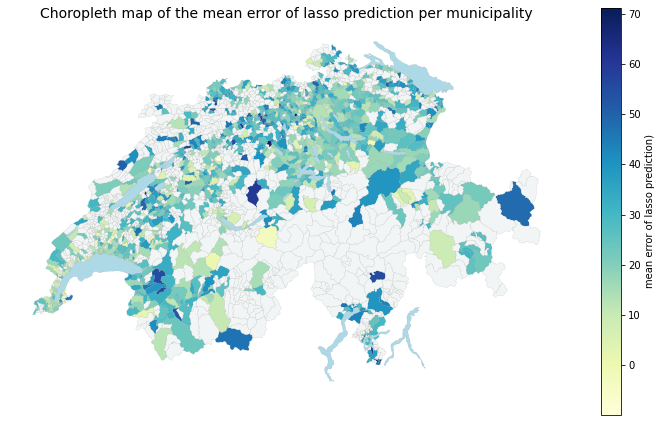

In [39]:
from matplotlib import cm

# color
cmap = cm.get_cmap("YlGnBu")

fig, ax = plt.subplots(1, figsize=(10, 6))

# plot the choropleth map
base = map_merged.plot(
    column="lasso_error",
    cmap=cmap,
    linewidth=0.1,
    ax=ax,
    edgecolor="0.5",
    legend=True,
    legend_kwds={"label": "mean error of lasso prediction)"},
    missing_kwds={
        "color": "#f2f5f5",
        "label": "Missing values",
    },
)

# plot the lakes
lake_map.plot(ax=base, color="lightblue", linewidth=0.1, edgecolor="0.5")

# title, axis,...
ax.axis("off")
ax.set_title(
    "Choropleth map of the mean error of lasso prediction per municipality",
    fontsize=14,
)
plt.tight_layout()
plt.show()

In [40]:
# show top 5 municipalities with the highest positive error
count_merged.sort_values(by="lasso_error").tail()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
951,Vallon,4.063,109.393,48.248,61.145,37.617,71.776,NaN,NaN,NaN,NaN
53,Balerna,4.229,115.945,50.302,65.643,48.806,67.139,NaN,NaN,NaN,NaN
468,Knutwil,4.259,109.964,41.184,68.780,40.382,69.582,NaN,NaN,NaN,NaN
306,Fischbach-Göslikon,4.271,112.068,43.042,69.026,40.632,71.437,NaN,NaN,NaN,NaN
942,Vacallo,4.365,125.899,54.734,71.164,47.949,77.950,NaN,NaN,NaN,NaN


In [41]:
# show top 5 municipalities with the highest negative error
count_merged.sort_values(by="lasso_error").head()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
284,Ersigen,2.949,29.370,39.248,-9.877,36.939,-7.569,NaN,NaN,NaN,NaN
158,Canobbio,3.456,49.816,57.502,-7.686,52.005,-2.189,NaN,NaN,NaN,NaN
361,Gollion,3.240,34.667,39.548,-4.881,38.735,-4.069,NaN,NaN,NaN,NaN
194,Coppet,3.021,32.844,35.880,-3.036,34.328,-1.485,NaN,NaN,NaN,NaN
376,Grindelwald,3.048,36.481,39.496,-3.015,34.988,1.493,NaN,NaN,NaN,NaN


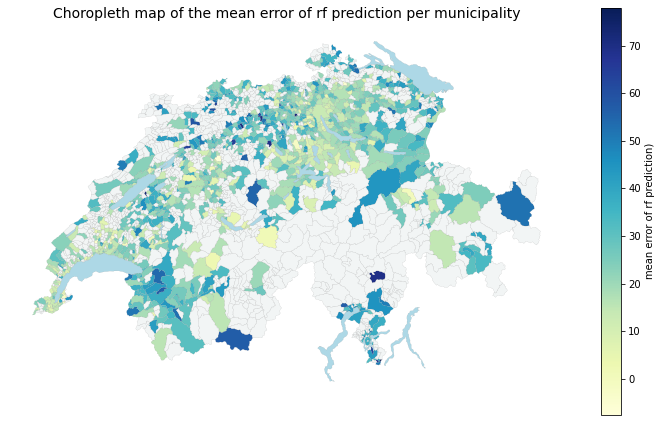

In [42]:
from matplotlib import cm

# color
cmap = cm.get_cmap("YlGnBu")

fig, ax = plt.subplots(1, figsize=(10, 6))

# plot the choropleth map
base = map_merged.plot(
    column="rf_error",
    cmap=cmap,
    linewidth=0.1,
    ax=ax,
    edgecolor="0.5",
    legend=True,
    legend_kwds={"label": "mean error of rf prediction)"},
    missing_kwds={
        "color": "#f2f5f5",
        "label": "Missing values",
    },
)

# plot the lakes
lake_map.plot(ax=base, color="lightblue", linewidth=0.1, edgecolor="0.5")

# title, axis,...
ax.axis("off")
ax.set_title(
    "Choropleth map of the mean error of rf prediction per municipality",
    fontsize=14,
)
plt.tight_layout()
plt.show()

The maps of the mean error by random forest and lasso regression look similar, meaning that they have the same troubles predicting the duration of insertion for certain municipalities.

In [43]:
# show top 5 municipalities with the highest positive error
count_merged.sort_values(by="rf_error").tail()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
431,Härkingen,4.091,110.195,50.565,59.631,40.099,70.097,NaN,NaN,NaN,NaN
374,Gretzenbach,4.234,108.964,51.689,57.274,38.512,70.452,NaN,NaN,NaN,NaN
306,Fischbach-Göslikon,4.271,112.068,43.042,69.026,40.632,71.437,NaN,NaN,NaN,NaN
951,Vallon,4.063,109.393,48.248,61.145,37.617,71.776,NaN,NaN,NaN,NaN
942,Vacallo,4.365,125.899,54.734,71.164,47.949,77.950,NaN,NaN,NaN,NaN


In [44]:
# show top 5 municipalities with the highest negative error
count_merged.sort_values(by="rf_error").head()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
284,Ersigen,2.949,29.370,39.248,-9.877,36.939,-7.569,NaN,NaN,NaN,NaN
235,Dinhard,2.880,30.407,30.293,0.115,35.590,-5.183,NaN,NaN,NaN,NaN
833,Seftigen,2.939,27.538,29.324,-1.786,31.700,-4.161,NaN,NaN,NaN,NaN
361,Gollion,3.240,34.667,39.548,-4.881,38.735,-4.069,NaN,NaN,NaN,NaN
245,Dänikon,2.836,24.500,24.777,-0.277,28.133,-3.633,NaN,NaN,NaN,NaN


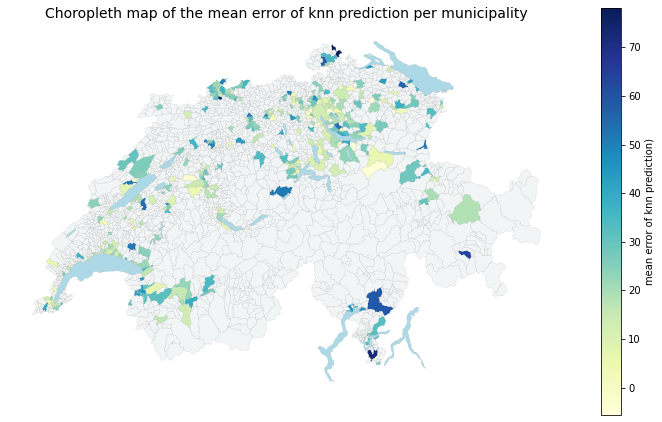

In [45]:
from matplotlib import cm

# color
cmap = cm.get_cmap("YlGnBu")

fig, ax = plt.subplots(1, figsize=(10, 6))

# plot the choropleth map
base = map_merged.plot(
    column="knn_error",
    cmap=cmap,
    linewidth=0.1,
    ax=ax,
    edgecolor="0.5",
    legend=True,
    legend_kwds={"label": "mean error of knn prediction)"},
    missing_kwds={
        "color": "#f2f5f5",
        "label": "Missing values",
    },
)

# plot the lakes
lake_map.plot(ax=base, color="lightblue", linewidth=0.1, edgecolor="0.5")

# title, axis,...
ax.axis("off")
ax.set_title(
    "Choropleth map of the mean error of knn prediction per municipality",
    fontsize=14,
)
plt.tight_layout()
plt.show()

In [46]:
# show top 5 municipalities with the highest positive error
count_merged.sort_values(by="knn_error", na_position='first').tail()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
73,Bellinzona,4.076,95.021,55.217,39.804,49.739,45.282,4.226,111.311,52.924,58.387
857,St. Moritz,3.705,73.682,42.816,30.866,38.522,35.160,3.892,99.500,36.087,63.413
570,Mendrisio,4.112,94.761,57.970,36.791,51.964,42.798,4.594,128.818,55.960,72.859
239,Dornach,3.728,73.608,40.320,33.288,35.394,38.214,4.114,110.111,37.089,73.022
894,Thayngen,3.939,83.773,44.023,39.750,37.950,45.823,4.269,114.947,36.792,78.156


In [47]:
# show top 5 municipalities with the highest negative error
count_merged.sort_values(by="knn_error").head()

,Gemeinde,Insertionsdauer_x,Insertionsdauer_normal_x,lasso_pred,lasso_error,rf_pred,rf_error,Insertionsdauer_y,Insertionsdauer_normal_y,knn_pred,knn_error
847,Sirnach,3.536,58.818,38.787,20.030,39.060,19.758,3.210,31.773,37.370,-5.598
227,Derendingen,3.608,62.470,41.276,21.194,38.508,23.962,3.161,32.200,37.524,-5.324
20,Altendorf,3.472,49.089,39.309,9.780,39.824,9.265,3.068,30.429,35.580,-5.151
356,Glarus,3.583,57.824,40.978,16.846,39.744,18.079,3.136,31.875,36.621,-4.746
578,Milvignes,3.489,57.647,34.768,22.879,32.535,25.111,3.014,26.389,30.105,-3.717
